Machine Learning and Data Science ‐ ENCS5341
Homework #2

---


Mahmoud Qaisi -190831

1- The first tasl in this homework is to learn a logistic regression model with a linear decision boundary by implementing the gradient descent algorithm. Then drawing the decicion boundary in order to classify the provided data. These are necessry libraries used in the code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

The first step is to read the training data. Notice that the class field is rpresented as (C1,C2) values so we must map these values to (0,1).

In [2]:
def res(data):
    y = np.zeros(len(data))
    for i in range(len(data)):
        if data[i] == 'C1':
            y[i] = 0
        else:
            y[i] = 1
    return y

data = pd.read_csv("train.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())

We start building our model by creating the ncessery functions for it.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model(x, w):  #our log likelyhood function.
    return sigmoid(np.dot(x, w))

def binary_cross_entropy(y, p):
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

def gradient(X, y, p): # this function caluclates the next iteration of weights.
  return np.dot(X.T, p - y) / len(y)

Then we set our parameters and initial wgheits to start the learning process.

In [9]:
X = np.hstack([np.ones((X.shape[0], 1)), X]) # a column of ones was added to ease the process of dot product.
alpha = 0.01
num_iter = 20000
w = np.zeros(X.shape[1])
loss = 100000000
err_m = 1e-9

for i in range(num_iter):   
  p = model(X, w)
  grad = gradient(X, y, p)
  w -= alpha * grad

After obtaining the final iteraton of weights, we use these weights to predict the output and compare it to the given output in the training set to calculate the accuracy.

In [10]:
predictions = (model(X, w) > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.6774193548387096


Finally we will plot the decion boundry along with a scatter plot of the data.

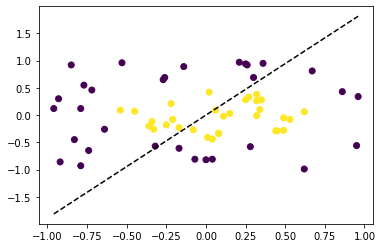

In [11]:
# Plot the decision boundary
x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, "k--")

# Plot the data points
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.show()

Now we use the same model we just trained to predict the output of the testing data.

Accuracy: 0.6363636363636364


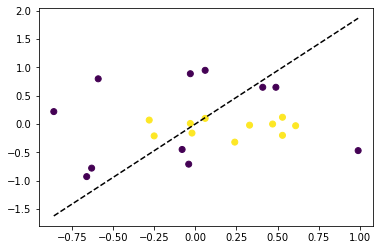

In [12]:
data = pd.read_csv("test.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())

X = np.hstack([np.ones((X.shape[0], 1)), X])

predictions = (model(X, w) > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x2 = -(w[0] + w[1]*x1) / w[2]

plt.plot(x1, x2, "k--")

plt.scatter(X[:, 1], X[:, 2], c=y)
plt.show()

2- The Second task is to use a non-linear decision boundary in the form of "w0+w1*x1^2+w2^2". In order to accomplish this we must make a few changes. we must square the input data and adjust the value of alpha.

In [13]:
data = pd.read_csv("train.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())
X_sqr = np.square(X)
X_sqr = np.hstack([np.ones((X_sqr.shape[0], 1)), X_sqr])

alpha = 0.4
num_iter = 30000
w = np.zeros(X_sqr.shape[1])


Now we must train our model using our transformed data. And predict the output of our training data to observe the accuracy of our model.

In [15]:
for i in range(num_iter):
  p = model(X_sqr, w)
  grad = gradient(X_sqr, y, p)
  w -= alpha * grad

predictions = (model(X_sqr, w) > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 1.0


Now in order to plot the decision boundary we use the np.meshgrid to draw out circle.

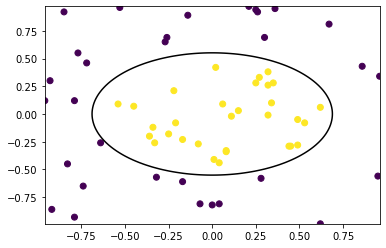

In [16]:
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
z = w[0] + w[1]*x1**2 + w[2]*x2**2
z = sigmoid(z)
plt.contour(x1, x2, z, levels=[0.5], cmap="gray")

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Repeat the previous steps on the testing data.

In [17]:
data = pd.read_csv("test.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())
X_sqr = np.square(X)
X_sqr = np.hstack([np.ones((X_sqr.shape[0], 1)), X_sqr])

predictions = (model(X_sqr, w) > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.9545454545454546


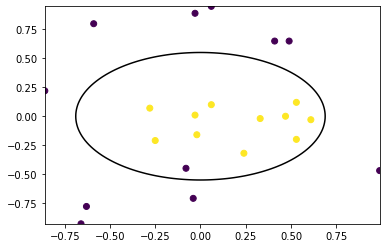

In [18]:
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
z = w[0] + w[1]*x1**2 + w[2]*x2**2
z = sigmoid(z)
plt.contour(x1, x2, z, levels=[0.5], cmap="gray")

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

As can it can be noticed in the previous results, the model with a linear decisin model under fits the data noticably with a testing  accuracy of about 68%. The reason for this is that the model type does not fit the data in question. Then a significant improvment appears when using the non-linear decision boindary. It may have over fitted the data bit because of a decrease in accuracy between trainig and testing but it may have been just noise. 

The final requierment is to Repeat parts 1 and 2 but now using the logistic regression implementation of scikit-learn python library.

In [19]:
data = pd.read_csv("train.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())

lrModel = LogisticRegression(random_state=0).fit(X, y)

print("Accuracy on training set: {:.3f}".format(lrModel.score(X, y)))

data = pd.read_csv("test.csv", skiprows=0, index_col=False)
X = data.iloc[:, [0,1]].to_numpy()
y = res(data['class'].tolist())

print("Accuracy on training set: {:.3f}".format(lrModel.score(X, y)))

Accuracy on training set: 0.661
Accuracy on training set: 0.682


The results here are similat to out results with the linear model.